In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
combined_data_df = pd.DataFrame(combined_data)
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combined_data_df.groupby("Mouse ID").count().shape[0]
print(f"There are {mouse_count} mice in the original dataset.")

There are 249 mice in the original dataset.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = combined_data_df[combined_data_df.duplicated(["Mouse ID","Timepoint"])]
dups_df = pd.DataFrame(dups)
dups_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
912,g989,Propriva,Female,21,26,20,54.657650,1
914,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,10,49.880528,0
918,g989,Propriva,Female,21,26,5,47.570392,0
920,g989,Propriva,Female,21,26,0,45.000000,0


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.loc[combined_data_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df.groupby("Mouse ID").count().shape[0]
print(f"There are {mouse_count} mice in the clean dataset.")

There are 248 mice in the clean dataset.


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
stats1_df = clean_df.groupby("Drug Regimen")
descrip_df = stats1_df["Tumor Volume (mm3)"].describe()
descrip_df = descrip_df.drop(["count","min","25%", "75%","max"], axis=1) 
descrip_df ["Variance"] = stats1_df["Tumor Volume (mm3)"].var()
descrip_df ["SEM"]= stats1_df["Tumor Volume (mm3)"].sem()
descrip_df.rename(columns = {'mean':'Mean', 'std':'Standard Deviation', '50%':'Median'}, inplace = True) 
stats1_df = descrip_df[['Mean','Median','Variance','Standard Deviation','SEM']]
stats1_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
again_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
again_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

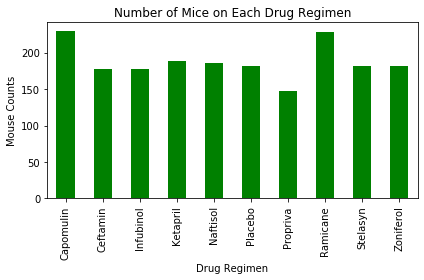

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
stats2_df = clean_df.groupby("Drug Regimen")
mouse_count = stats2_df["Mouse ID"].count()
mouse_count.plot(kind="bar", facecolor="green")
plt.title ("Number of Mice on Each Drug Regimen")
plt.ylabel ("Mouse Counts")
plt.tight_layout()
plt.savefig("../mice_drug.png")
plt.show()

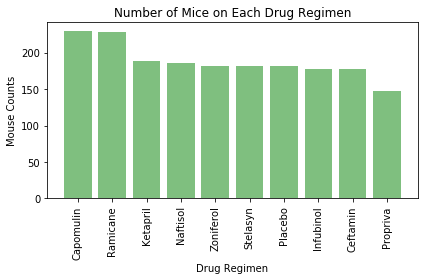

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
medsmouse_count = clean_df["Drug Regimen"].value_counts()
medsmouse_df=pd.DataFrame(medsmouse_count)
x_axis = np.arange(len(medsmouse_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis,medsmouse_df["Drug Regimen"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, medsmouse_df.index, rotation="vertical")
plt.title ("Number of Mice on Each Drug Regimen")
plt.ylabel ("Mouse Counts")
plt.xlabel ("Drug Regimen")
plt.tight_layout()
plt.savefig("../mice_drug2.png")
plt.show()

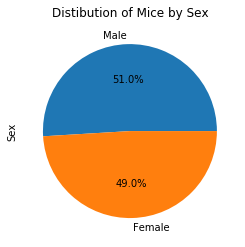

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genmouse_count = clean_df["Sex"].value_counts()
genmouse_count.plot(kind="pie", subplots=True, autopct="%1.1f%%")
plt.title ("Distibution of Mice by Sex")
plt.savefig("../mice_sex.png")
plt.show()

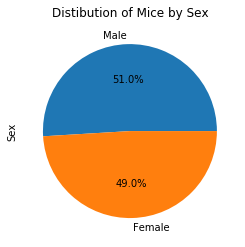

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
stats3=clean_df["Sex"].value_counts()
labels = ["Male", "Female"]
plt.pie(stats3, labels = labels, autopct="%1.1f%%")
plt.title ("Distibution of Mice by Sex")
plt.ylabel("Sex")
plt.savefig("../mice_sex2.png")
plt.show()

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:   
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#filter and compile data just for Capomulin, Ramicane, Infubinol, and Ceftamin
maxcompile_df = pd.DataFrame()
max_df = pd.DataFrame()
mice_df_cap = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")] 
compile_df = mice_df_cap
mice_df_ram = clean_df.loc[(clean_df["Drug Regimen"] == "Ramicane")] 
compile_df=compile_df.append(mice_df_ram)
mice_df_inf = clean_df.loc[(clean_df["Drug Regimen"] == "Infubinol")] 
compile_df=compile_df.append(mice_df_inf)
mice_df_cef = clean_df.loc[(clean_df["Drug Regimen"] == "Ceftamin")] 
compile_df=compile_df.append(mice_df_cef)
compile_df=pd.DataFrame(compile_df)

#Find unique mouse IDs 
mice_id = compile_df["Mouse ID"]
mice_id = mice_id.unique()
mice_id

#Iterate through unique mouse ID, creating a dataframe for each and finding the max Timepoint, append to compile for the final df
for m in mice_id:
    max_df = (compile_df.loc[(compile_df["Mouse ID"]== m)])
#from https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan
    max_df = max_df[max_df['Timepoint']==max_df['Timepoint'].max()]
    maxcompile_df=maxcompile_df.append(max_df)
maxcompile_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


Capomulin
lower quartile = 37.685932865
upper quartile = 45.0
interquartile range = 7.314067135000002
median of Tumor Volume (mm3) = 41.557808879999996
lower bound = 26.714832162499995
upper bound = 55.9711007025


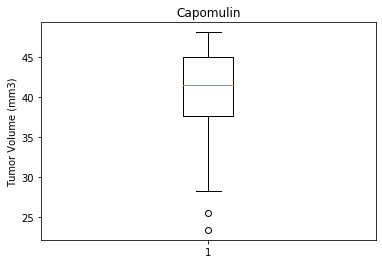

_____________________________________________________________________________________________________
Ramicane
lower quartile = 36.67463458499999
upper quartile = 45.0
interquartile range = 8.325365415000007
median of Tumor Volume (mm3) = 40.67323554
lower bound = 24.18658646249998
upper bound = 57.48804812250001


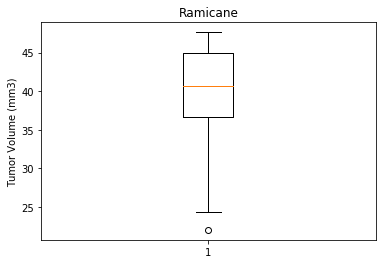

_____________________________________________________________________________________________________
Infubinol
lower quartile = 47.3123533
upper quartile = 57.314443967500004
interquartile range = 10.002090667500006
median of Tumor Volume (mm3) = 51.82058438
lower bound = 32.309217298749985
upper bound = 72.31757996875001


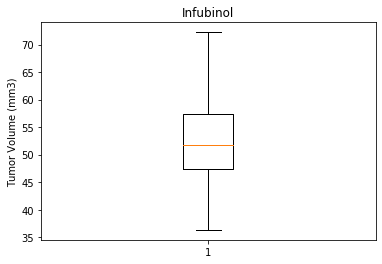

_____________________________________________________________________________________________________
Ceftamin
lower quartile = 47.208427112500004
upper quartile = 56.801437570000004
interquartile range = 9.5930104575
median of Tumor Volume (mm3) = 51.77615728000001
lower bound = 32.818911426250004
upper bound = 71.19095325625


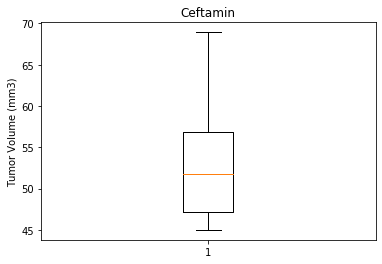

_____________________________________________________________________________________________________


[None, None, None, None]

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drug= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_vol = mice_df_cap["Tumor Volume (mm3)"]
ram_vol = mice_df_ram["Tumor Volume (mm3)"]
inf_vol = mice_df_inf["Tumor Volume (mm3)"]
cef_vol = mice_df_cef["Tumor Volume (mm3)"]

#tumor_vol = [cap_vol, ram_vol, inf_vol, cef_vol]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def FUNction(drug):
    drug_df = clean_df.loc[clean_df["Drug Regimen"]== drug,"Tumor Volume (mm3)"] 
    quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    #series.loc[index_name]
    print(f"{drug}")
    print(f"lower quartile = {lowerq}")
    print(f"upper quartile = {upperq}")
    print(f"interquartile range = {iqr}")
    print(f"median of Tumor Volume (mm3) = {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"lower bound = {lower_bound}")
    print(f"upper bound = {upper_bound}")
    
    fig1, ax1 = plt.subplots()
    ax1.set_title(drug)
    ax1.set_ylabel("Tumor Volume (mm3)")
    ax1.boxplot(drug_df)
    plt.show()
    print(f"_____________________________________________________________________________________________________")

[FUNction(d) for d in drug]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    # Determine outliers using upper and lower bounds


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#above in FUNction

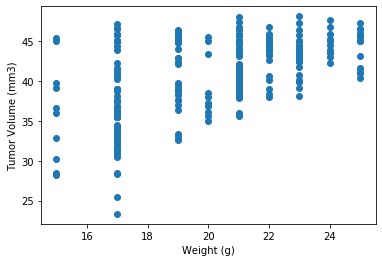

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = mice_df_cap['Weight (g)']
y_values = mice_df_cap['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

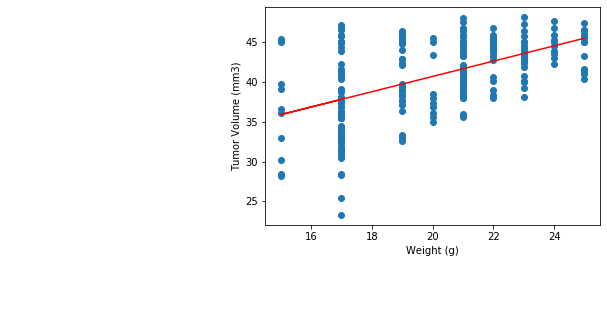

In [16]:
x_values = mice_df_cap['Weight (g)']
y_values = mice_df_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()